In [130]:
import pandas as pd
import datetime, warnings, scipy 
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap

dfnew=pd.read_csv('FlightDelays.csv', nrows=100000)
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS,EMPFULL,EMPPART,EMPTOTAL,EMPFTE,NET_INCOME,OP_REVENUES
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,NaN,NaN,NaN,2677.0,4191.0,109.0,4300.0,4246.0,-126.37,674.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,1,8,1,2018-01-08,AS,64,5230,PSG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2018,1,1,9,2,2018-01-09,AS,64,5230,PSG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,2018,1,1,10,3,2018-01-10,AS,64,5230,PSG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,2018,1,1,11,4,2018-01-11,AS,64,5230,PSG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:

dfnew.drop(['EMPFULL','EMPPART','EMPTOTAL','EMPFTE','NET_INCOME','OP_REVENUES'],axis=1,inplace=True)

In [132]:
dfnew=dfnew.rename(columns={"DEST": "DESTINATION", "CRS_DEP_TIME": "SCHEDULED_DEPARTURE", "CRS_ARR_TIME":"SCHEDULED_ARRIVAL","DEP_TIME":"ACTUAL_DEPARTURE","ARR_TIME":"ACTUAL_ARRIVAL","DEP_DELAY":"DEPARTURE_DELAY","ARR_DELAY":"ARRIVAL_DELAY"})
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,63,55.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,65,54.0,37.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,61,60.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,65,51.0,34.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,59,55.0,33.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,1,8,1,2018-01-08,AS,64,5230,PSG,...,24,30.0,17.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99996,2018,1,1,9,2,2018-01-09,AS,64,5230,PSG,...,24,25.0,9.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99997,2018,1,1,10,3,2018-01-10,AS,64,5230,PSG,...,24,29.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99998,2018,1,1,11,4,2018-01-11,AS,64,5230,PSG,...,24,27.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
dfnew['FL_DATE']=pd.to_datetime(dfnew.YEAR*10000+dfnew.MONTH*100+dfnew.DAY_OF_MONTH,format='%Y%m%d')
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,63,55.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,65,54.0,37.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,61,60.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,65,51.0,34.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,59,55.0,33.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,1,8,1,2018-01-08,AS,64,5230,PSG,...,24,30.0,17.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99996,2018,1,1,9,2,2018-01-09,AS,64,5230,PSG,...,24,25.0,9.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99997,2018,1,1,10,3,2018-01-10,AS,64,5230,PSG,...,24,29.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99998,2018,1,1,11,4,2018-01-11,AS,64,5230,PSG,...,24,27.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
dfnew.dtypes

YEAR                            int64
QUARTER                         int64
MONTH                           int64
DAY_OF_MONTH                    int64
DAY_OF_WEEK                     int64
FL_DATE                datetime64[ns]
CARRIER                        object
FL_NUM                          int64
Route                           int64
ORIGIN                         object
DESTINATION                    object
DEST_CITY                      object
DEST_STATE                     object
SCHEDULED_DEPARTURE             int64
ACTUAL_DEPARTURE              float64
DEPARTURE_DELAY               float64
DEP_DELAY_NEW                 float64
DEP_DEL15                     float64
DEP_DELAY_GROUP               float64
DEP_TIME_BLK                   object
TAXI_OUT                      float64
WHEELS_OFF                    float64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL               int64
ACTUAL_ARRIVAL                float64
ARRIVAL_DELA

In [135]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(dfnew, col):    
    liste = []
    for index, cols in dfnew[['FL_DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [136]:
dfnew['SCHEDULED_DEPARTURE'] = create_flight_time(dfnew, 'SCHEDULED_DEPARTURE')
dfnew['ACTUAL_DEPARTURE'] = dfnew['ACTUAL_DEPARTURE'].apply(format_heure)
dfnew['SCHEDULED_ARRIVAL'] = dfnew['SCHEDULED_ARRIVAL'].apply(format_heure)
dfnew['ACTUAL_ARRIVAL'] = dfnew['ACTUAL_ARRIVAL'].apply(format_heure)
#__________________________________________________________________________
dfnew.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ACTUAL_DEPARTURE',
             'ACTUAL_ARRIVAL', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ACTUAL_DEPARTURE,ACTUAL_ARRIVAL,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2018-01-01 07:00:00,08:03:00,06:56:00,07:51:00,-4.0,-12.0
1,2018-01-01 15:11:00,16:16:00,15:10:00,16:04:00,-1.0,-12.0
2,2018-01-02 06:25:00,07:26:00,06:20:00,07:20:00,-5.0,-6.0
3,2018-01-02 15:11:00,16:16:00,15:07:00,15:58:00,-4.0,-18.0
4,2018-01-03 06:30:00,07:29:00,06:31:00,07:26:00,1.0,-3.0
5,2018-01-03 17:59:00,19:07:00,18:09:00,19:05:00,10.0,-2.0


In [80]:
dfnew['ARRIVAL_DELAY'].values

array([-12., -12.,  -6., ..., -12., -22.,  15.])

In [4]:
dfnew["ARRIVAL_DELAY"]=dfnew["ARRIVAL_DELAY"]/dfnew["ARRIVAL_DELAY"].max()

In [29]:
dfnew["CARRIER_DELAY"]=dfnew["CARRIER_DELAY"]/dfnew["CARRIER_DELAY"].max()

In [75]:
dfnew.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
CARRIER                    0
FL_NUM                     0
Route                      0
ORIGIN                     0
DESTINATION                0
DEST_CITY                  0
DEST_STATE                 0
SCHEDULED_DEPARTURE        0
ACTUAL_DEPARTURE        2634
DEPARTURE_DELAY         3125
DEP_DELAY_NEW           3125
DEP_DEL15               3125
DEP_DELAY_GROUP         3125
DEP_TIME_BLK               0
TAXI_OUT                2680
WHEELS_OFF              2680
WHEELS_ON               2732
TAXI_IN                 2732
SCHEDULED_ARRIVAL          0
ACTUAL_ARRIVAL          2732
ARRIVAL_DELAY           3053
ARR_DELAY_NEW           3053
ARR_DEL15               3053
ARR_DELAY_GROUP         3053
ARR_TIME_BLK               0
CANCELED                   0
CANCELLATION_CODE      97306
DIVERTED                   0
CRS_ELAPSED_TI

In [32]:
mean=dfnew["CARRIER_DELAY"].mean()
dfnew["CARRIER_DELAY"].replace(np.nan,mean)
mean

0.01131443470461169

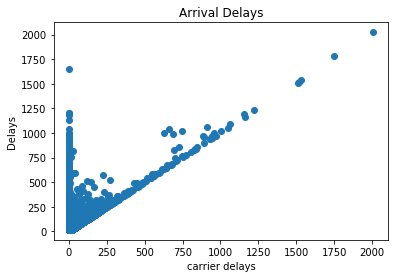

In [121]:
x=dfnew["CARRIER_DELAY"]
y=dfnew["ARRIVAL_DELAY"]
plt.title("Arrival Delays")
plt.xlabel("carrier delays")
plt.ylabel("Delays")
plt.scatter(x,y)

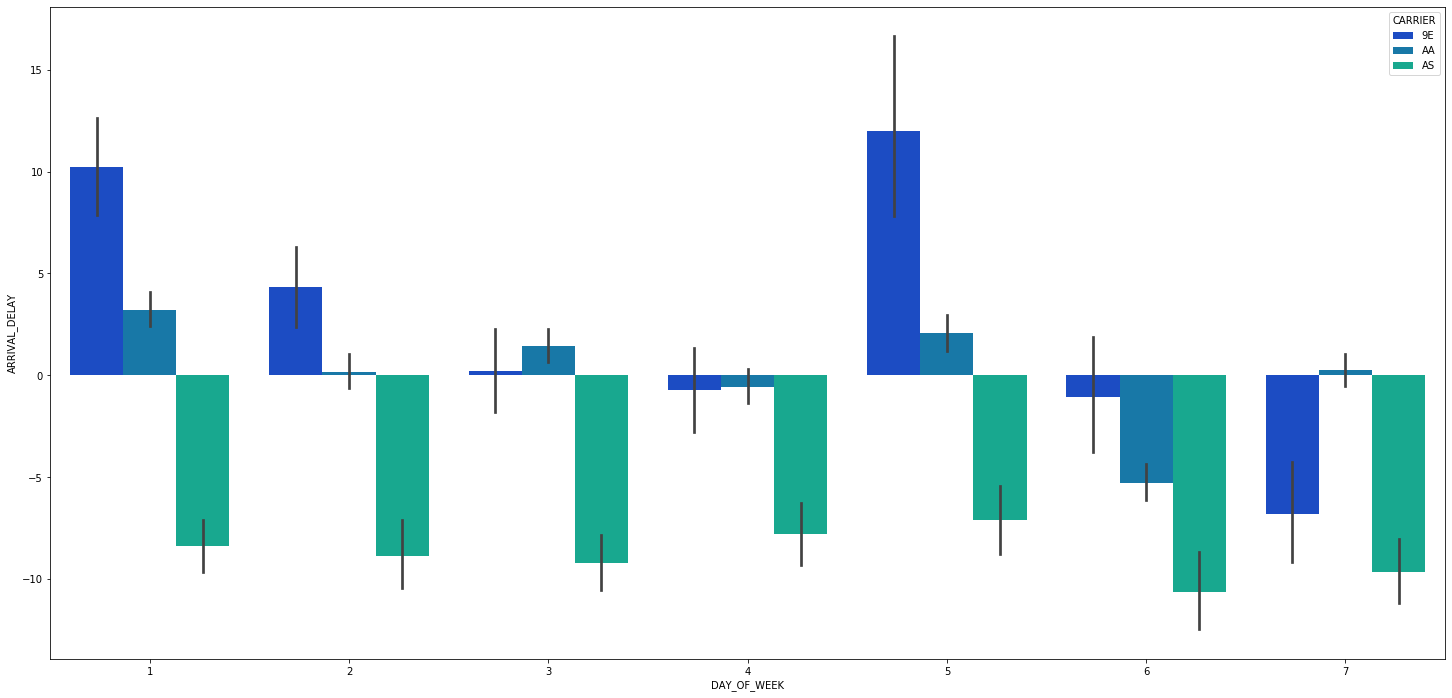

In [82]:
plt.figure(figsize=[25,12])
sns.barplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", hue='CARRIER',data=dfnew, palette="winter")

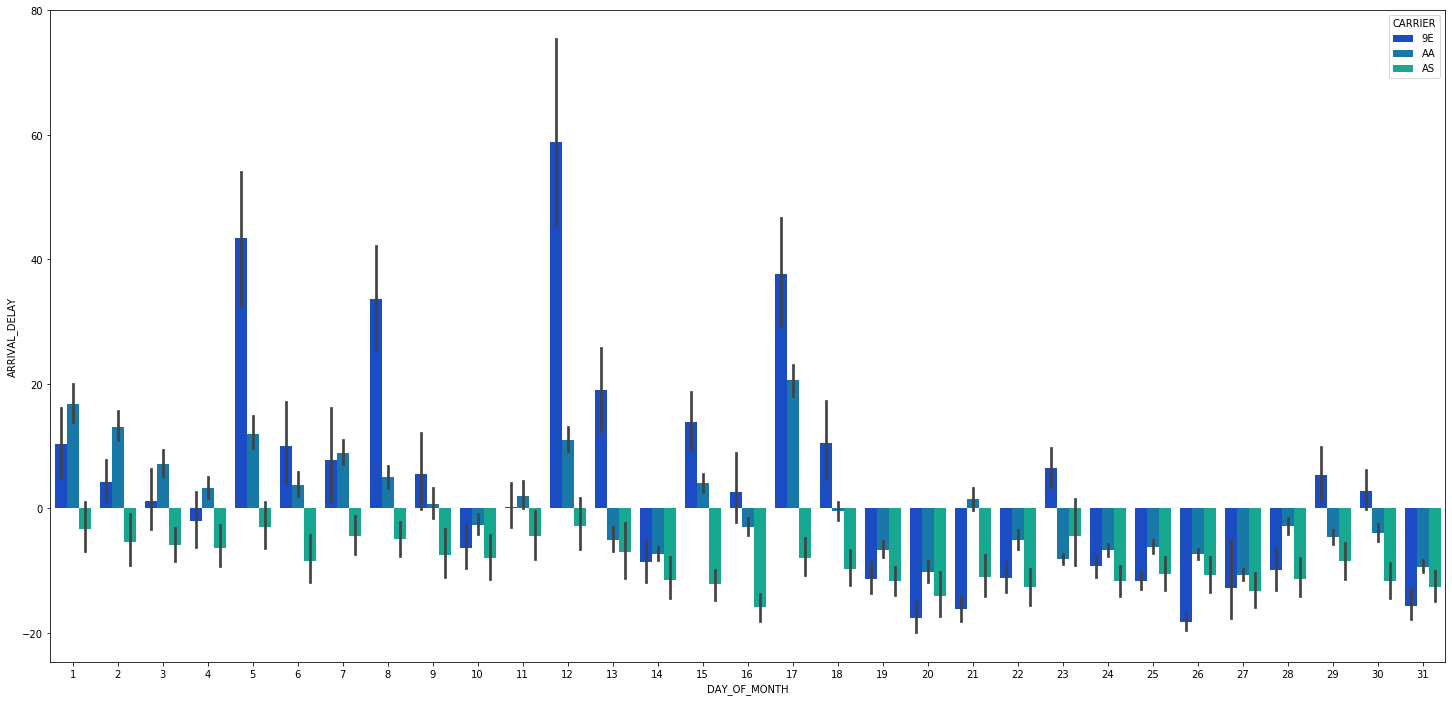

In [83]:
plt.figure(figsize=[25,12])
sns.barplot(x="DAY_OF_MONTH", y="ARRIVAL_DELAY", hue='CARRIER',data=dfnew, palette="winter")

<Figure size 1800x864 with 0 Axes>

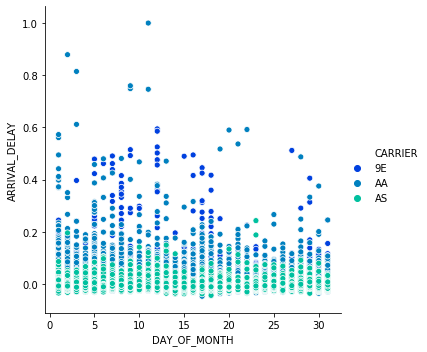

In [12]:
plt.figure(figsize=[25,12])
sns.relplot(x="DAY_OF_MONTH", y="ARRIVAL_DELAY", hue='CARRIER',data=dfnew, palette="winter")

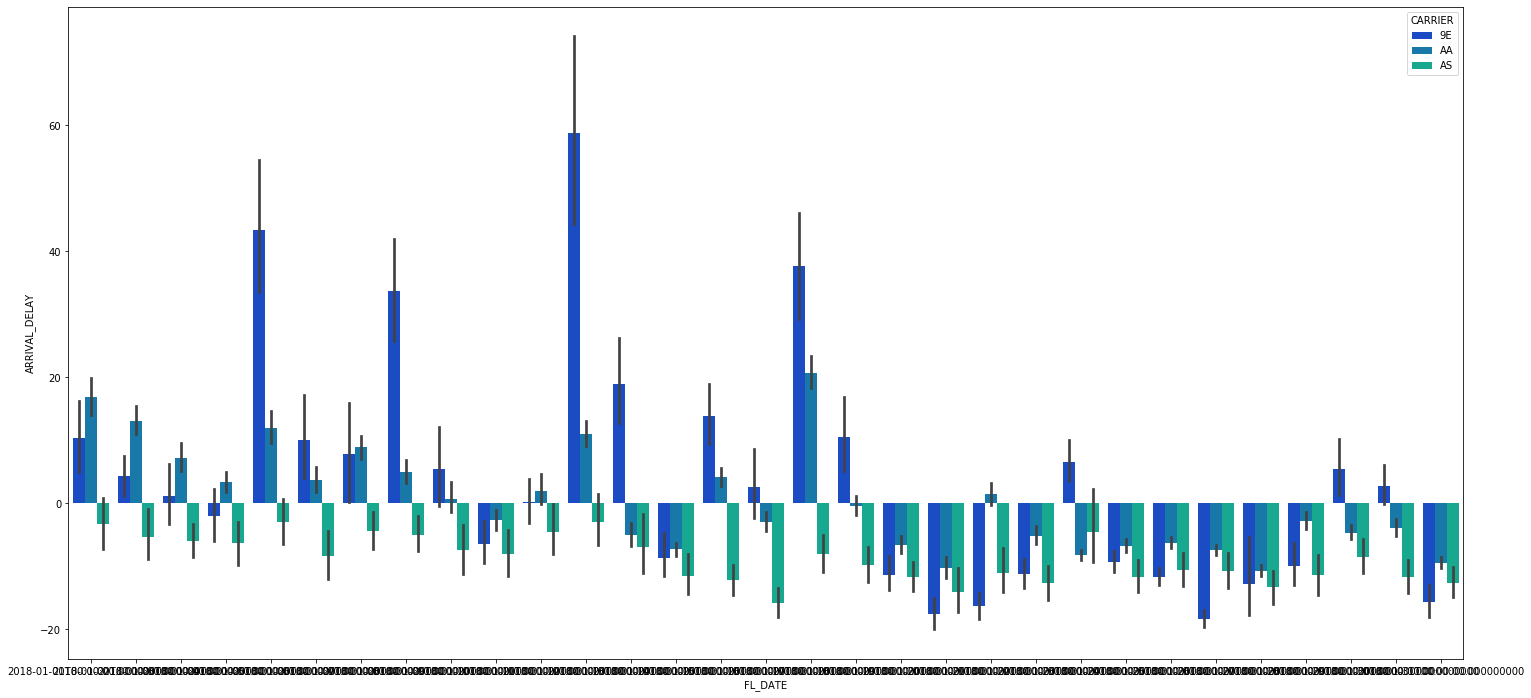

In [84]:
plt.figure(figsize=[25,12])
sns.barplot(x="FL_DATE", y="ARRIVAL_DELAY", hue='CARRIER',data=dfnew, palette="winter")

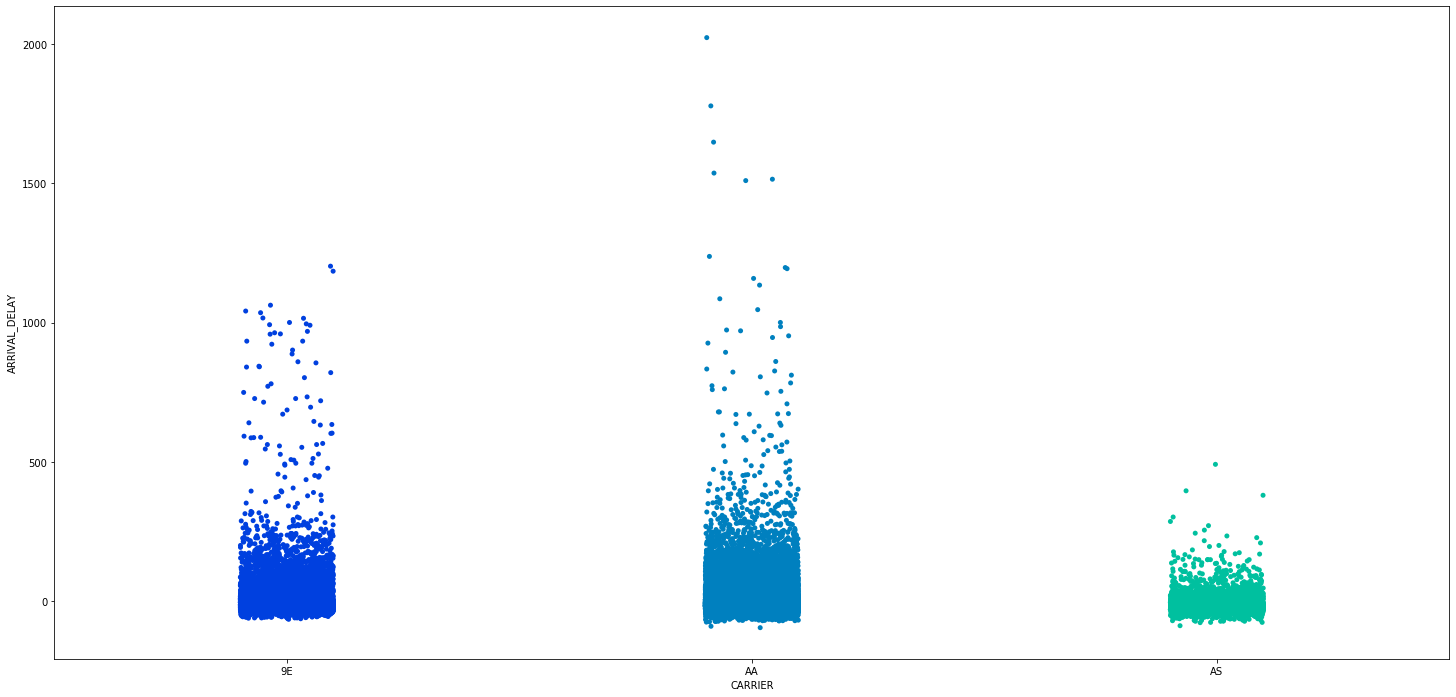

In [85]:
plt.figure(figsize=[25,12])
sns.stripplot(x="CARRIER", y="ARRIVAL_DELAY",data=dfnew, palette="winter")

In [86]:
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,63,55.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,65,54.0,37.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,61,60.0,38.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,65,51.0,34.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,59,55.0,33.0,145,NaN,NaN,NaN,NaN,NaN,2677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,1,8,1,2018-01-08,AS,64,5230,PSG,...,24,30.0,17.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99996,2018,1,1,9,2,2018-01-09,AS,64,5230,PSG,...,24,25.0,9.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99997,2018,1,1,10,3,2018-01-10,AS,64,5230,PSG,...,24,29.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN
99998,2018,1,1,11,4,2018-01-11,AS,64,5230,PSG,...,24,27.0,10.0,31,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
dfnew.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
CARRIER                    0
FL_NUM                     0
Route                      0
ORIGIN                     0
DESTINATION                0
DEST_CITY                  0
DEST_STATE                 0
SCHEDULED_DEPARTURE        0
ACTUAL_DEPARTURE        2634
DEPARTURE_DELAY         3125
DEP_DELAY_NEW           3125
DEP_DEL15               3125
DEP_DELAY_GROUP         3125
DEP_TIME_BLK               0
TAXI_OUT                2680
WHEELS_OFF              2680
WHEELS_ON               2732
TAXI_IN                 2732
SCHEDULED_ARRIVAL          0
ACTUAL_ARRIVAL          2732
ARRIVAL_DELAY           3053
ARR_DELAY_NEW           3053
ARR_DEL15               3053
ARR_DELAY_GROUP         3053
ARR_TIME_BLK               0
CANCELED                   0
CANCELLATION_CODE      97306
DIVERTED                   0
CRS_ELAPSED_TI

In [92]:
mean=dfnew["CARRIER_DELAY"].mean()
dfnew["CARRIER_DELAY"].replace(np.NaN,mean,inplace=True)
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS
0,2018,1,1,1,1,2018-01-01,9E,3331,42,ABY,...,63,55.0,38.0,145,22.70807,NaN,NaN,NaN,NaN,2677.0
1,2018,1,1,1,1,2018-01-01,9E,3940,42,ABY,...,65,54.0,37.0,145,22.70807,NaN,NaN,NaN,NaN,2677.0
2,2018,1,1,2,2,2018-01-02,9E,3409,42,ABY,...,61,60.0,38.0,145,22.70807,NaN,NaN,NaN,NaN,2677.0
3,2018,1,1,2,2,2018-01-02,9E,3940,42,ABY,...,65,51.0,34.0,145,22.70807,NaN,NaN,NaN,NaN,2677.0
4,2018,1,1,3,3,2018-01-03,9E,3353,42,ABY,...,59,55.0,33.0,145,22.70807,NaN,NaN,NaN,NaN,2677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,1,1,8,1,2018-01-08,AS,64,5230,PSG,...,24,30.0,17.0,31,22.70807,NaN,NaN,NaN,NaN,NaN
99996,2018,1,1,9,2,2018-01-09,AS,64,5230,PSG,...,24,25.0,9.0,31,22.70807,NaN,NaN,NaN,NaN,NaN
99997,2018,1,1,10,3,2018-01-10,AS,64,5230,PSG,...,24,29.0,10.0,31,22.70807,NaN,NaN,NaN,NaN,NaN
99998,2018,1,1,11,4,2018-01-11,AS,64,5230,PSG,...,24,27.0,10.0,31,22.70807,NaN,NaN,NaN,NaN,NaN


In [18]:
dfnew.replace(subset=["NAS_DELAY"],axis=0,inplace=True)

In [19]:
dfnew

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,Route,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,PASSENGERS
6,2018,1,1,4,4,2018-01-04,9E,3353,42,ABY,...,59,93.0,40.0,145,0.0,0.0,27.0,0.0,0.0,2677.0
10,2018,1,1,6,6,2018-01-06,9E,3353,42,ABY,...,58,75.0,37.0,145,13.0,0.0,17.0,0.0,0.0,2677.0
13,2018,1,1,7,7,2018-01-07,9E,3298,42,ABY,...,62,53.0,35.0,145,641.0,0.0,0.0,0.0,0.0,2677.0
15,2018,1,1,8,1,2018-01-08,9E,3353,42,ABY,...,59,52.0,34.0,145,0.0,224.0,0.0,0.0,12.0,2677.0
16,2018,1,1,8,1,2018-01-08,9E,3298,42,ABY,...,62,57.0,38.0,145,0.0,0.0,28.0,0.0,14.0,2677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99960,2018,1,1,4,4,2018-01-04,AS,65,5229,PSG,...,45,41.0,23.0,123,0.0,0.0,0.0,0.0,32.0,496.0
99969,2018,1,1,13,6,2018-01-13,AS,65,5229,PSG,...,39,43.0,24.0,123,0.0,34.0,4.0,0.0,102.0,496.0
99985,2018,1,1,29,1,2018-01-29,AS,65,5229,PSG,...,39,36.0,24.0,123,0.0,0.0,0.0,0.0,17.0,496.0
99986,2018,1,1,30,2,2018-01-30,AS,65,5229,PSG,...,39,59.0,31.0,123,0.0,0.0,22.0,0.0,0.0,496.0


In [20]:
dfnew.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
CARRIER                    0
FL_NUM                     0
Route                      0
ORIGIN                     0
DESTINATION                0
DEST_CITY                  0
DEST_STATE                 0
SCHEDULED_DEPARTURE        0
ACTUAL_DEPARTURE           0
DEPARTURE_DELAY           35
DEP_DELAY_NEW             35
DEP_DEL15                 35
DEP_DELAY_GROUP           35
DEP_TIME_BLK               0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
SCHEDULED_ARRIVAL          0
ACTUAL_ARRIVAL             0
ARRIVAL_DELAY              0
ARR_DELAY_NEW              0
ARR_DEL15                  0
ARR_DELAY_GROUP            0
ARR_TIME_BLK               0
CANCELED                   0
CANCELLATION_CODE      15216
DIVERTED                   0
CRS_ELAPSED_TI

In [231]:
dftest=dfnew[['CARRIER','DAY_OF_WEEK','ARRIVAL_DELAY']]
dftest

,CARRIER,DAY_OF_WEEK,ARRIVAL_DELAY
0,9E,1,-12.0
1,9E,1,-12.0
2,9E,2,-6.0
3,9E,2,-18.0
4,9E,3,-3.0
...,...,...,...
99995,AS,1,-9.0
99996,AS,2,-26.0
99997,AS,3,-12.0
99998,AS,4,-22.0


In [232]:
dfgrp=dftest.groupby(['CARRIER','DAY_OF_WEEK'],as_index=False).mean()
dfgrp

,CARRIER,DAY_OF_WEEK,ARRIVAL_DELAY
0,9E,1,10.219705
1,9E,2,4.337891
2,9E,3,0.219892
3,9E,4,-0.751453
4,9E,5,11.996466
5,9E,6,-1.058621
6,9E,7,-6.824561
7,AA,1,3.222887
8,AA,2,0.155465
9,AA,3,1.455332


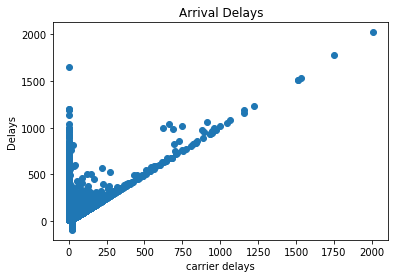

In [99]:
x=dfnew["CARRIER_DELAY"]
y=dfnew["ARRIVAL_DELAY"]
plt.title("Arrival Delays")
plt.xlabel("carrier delays")
plt.ylabel("Delays")
plt.scatter(x,y)

In [233]:
df2=dfgrp
df2

,CARRIER,DAY_OF_WEEK,ARRIVAL_DELAY
0,9E,1,10.219705
1,9E,2,4.337891
2,9E,3,0.219892
3,9E,4,-0.751453
4,9E,5,11.996466
5,9E,6,-1.058621
6,9E,7,-6.824561
7,AA,1,3.222887
8,AA,2,0.155465
9,AA,3,1.455332


In [234]:
df3=pd.get_dummies(df2['CARRIER'])
df3


,9E,AA,AS
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,1,0
8,0,1,0
9,0,1,0


In [237]:
df4 = df2

In [243]:
df4['AS'] = df3['AS']

In [244]:
df4

,CARRIER,DAY_OF_WEEK,ARRIVAL_DELAY,9E,AA,AS
0,9E,1,10.219705,1,0,0
1,9E,2,4.337891,1,0,0
2,9E,3,0.219892,1,0,0
3,9E,4,-0.751453,1,0,0
4,9E,5,11.996466,1,0,0
5,9E,6,-1.058621,1,0,0
6,9E,7,-6.824561,1,0,0
7,AA,1,3.222887,0,1,0
8,AA,2,0.155465,0,1,0
9,AA,3,1.455332,0,1,0


In [218]:
df2

,CARRIER,DAY_OF_WEEK,ARRIVAL_DELAY
0,9E,1,10.219705
1,9E,2,4.337891
2,9E,3,0.219892
3,9E,4,-0.751453
4,9E,5,11.996466
5,9E,6,-1.058621
6,9E,7,-6.824561
7,AA,1,3.222887
8,AA,2,0.155465
9,AA,3,1.455332


In [140]:
df_pivot=df2.pivot(index='CARRIER',columns='DAY_OF_WEEK')

In [141]:
df_pivot

ARRIVAL_DELAY                                                      \
DAY_OF_WEEK             1         2         3         4          5          6   
CARRIER                                                                         
9E              10.219705  4.337891  0.219892 -0.751453  11.996466  -1.058621   
AA               3.222887  0.155465  1.455332 -0.573313   2.070167  -5.296228   
AS              -8.386489 -8.905976 -9.253968 -7.801784  -7.096210 -10.644654   

                       
DAY_OF_WEEK         7  
CARRIER                
9E          -6.824561  
AA           0.237994  
AS          -9.649390

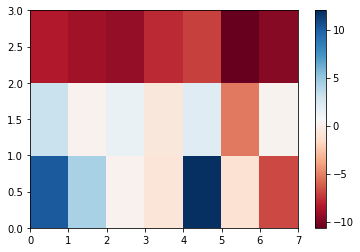

In [143]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

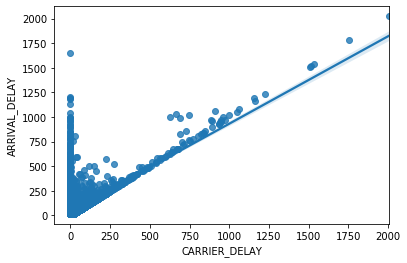

In [149]:
sns.regplot(x="CARRIER_DELAY",y="ARRIVAL_DELAY",data=dfnew)


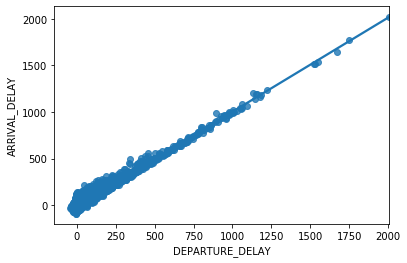

In [159]:
sns.regplot(x="DEPARTURE_DELAY",y="ARRIVAL_DELAY",data=dfnew)

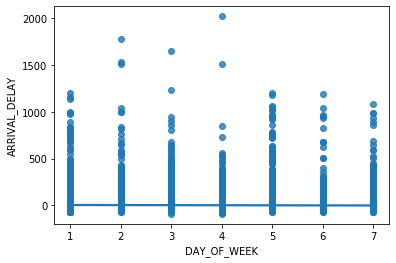

In [186]:
sns.regplot(x="DAY_OF_WEEK",y="ARRIVAL_DELAY",data=dfnew)

In [166]:
from sklearn.linear_model import LinearRegression
X=df2['DAY_OF_WEEK']
Y=df2['ARRIVAL_DELAY']

In [169]:
X.shape

(21,)

In [170]:
Y.shape

(21,)

In [171]:
X=X.values.reshape(-1,1)

In [172]:
X.shape

(21, 1)

In [ ]:
reg=LinearRegression().fit(X,Y)

In [174]:
Yhat=reg.predict(X)

In [175]:
Yhat

array([ 0.64517791, -0.24173614, -1.12865018, -2.01556423, -2.90247827,
       -3.78939231, -4.67630636,  0.64517791, -0.24173614, -1.12865018,
       -2.01556423, -2.90247827, -3.78939231, -4.67630636,  0.64517791,
       -0.24173614, -1.12865018, -2.01556423, -2.90247827, -3.78939231,
       -4.67630636])

In [176]:
reg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [177]:
reg.coef_

array([-0.88691404])

In [179]:
reg.intercept_

1.5320919513823745

In [182]:
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]], dtype=int64)

In [183]:
Y

0     10.219705
1      4.337891
2      0.219892
3     -0.751453
4     11.996466
5     -1.058621
6     -6.824561
7      3.222887
8      0.155465
9      1.455332
10    -0.573313
11     2.070167
12    -5.296228
13     0.237994
14    -8.386489
15    -8.905976
16    -9.253968
17    -7.801784
18    -7.096210
19   -10.644654
20    -9.649390
Name: ARRIVAL_DELAY, dtype: float64

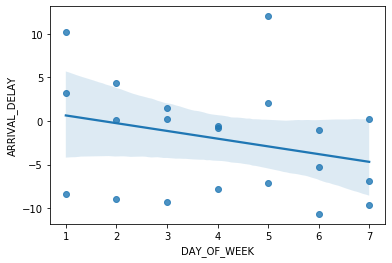

In [185]:
sns.regplot(x="DAY_OF_WEEK",y="ARRIVAL_DELAY",data=df2)

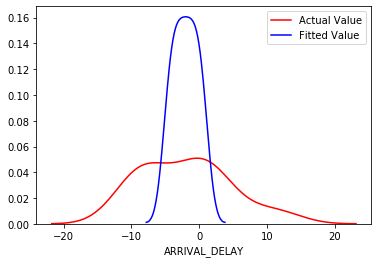

In [188]:
ax1=sns.distplot(df2['ARRIVAL_DELAY'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat , hist=False,color="b", label="Fitted Value", ax=ax1)

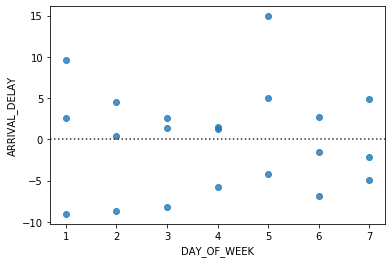

In [189]:
sns.residplot(df2['DAY_OF_WEEK'],df2['ARRIVAL_DELAY'])

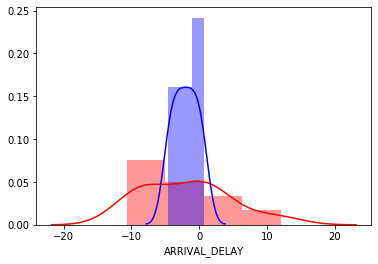

In [190]:
ax1=sns.distplot(df2['ARRIVAL_DELAY'], hist=True, color="r", label="Actual Value")
sns.distplot(Yhat , hist=True,color="b", label="Fitted Value", ax=ax1)

In [204]:
reg.score(X,Y)

0.07976797669812552

In [193]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()
Scale.fit(df2[['DAY_OF_WEEK','CARRIER']])
x_scale=Scale.transform(df2[['DAY_OF_WEEK','CARRIER']])

ValueError: could not convert string to float: '9E'

In [206]:
from sklearn.metrics import mean_squared_error as mse
mse(df2['ARRIVAL_DELAY'],Yhat)

36.298762658497346

In [251]:
from sklearn.linear_model import LinearRegression
X1=df4[['DAY_OF_WEEK','9E','AA','AS']]
Y1=df4['ARRIVAL_DELAY']

In [252]:
X1.shape


(21, 4)

In [253]:
Y1.shape

(21,)

In [254]:
Y1=Y1.values.reshape(-1,1)

In [255]:
Y1.shape

(21, 1)

In [256]:
ml=LinearRegression().fit(X1, Y1)

In [257]:
Yhat1=ml.predict(X1)

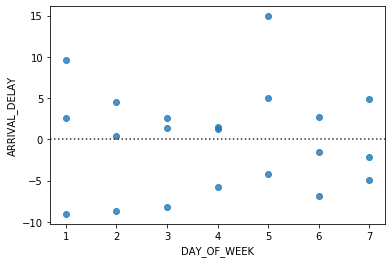

In [260]:
sns.residplot(df4['DAY_OF_WEEK'],df4['ARRIVAL_DELAY'])

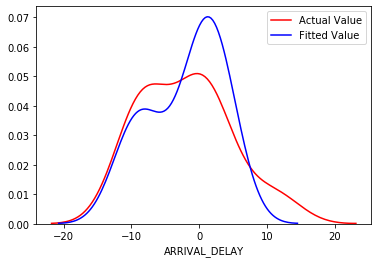

In [261]:
ax1=sns.distplot(df4['ARRIVAL_DELAY'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1 , hist=False,color="b", label="Fitted Value", ax=ax1)

In [262]:
ml.score(X1,Y1)

0.6911565241495916

In [263]:
from sklearn.metrics import mean_squared_error as mse
mse(df4['ARRIVAL_DELAY'],Yhat1)

12.18240155161583